***"There are several Python libraries which provide solid implementations of a range of machine learning algorithms.***

***One of the best known is Scikit-Learn, a package that provides efficient versions of a large number of common algorithms. Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.***

***A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward."***

<font size=2>*Jake VanderPlas, Python Data Science Handbook*</font>


*In *Sklearn the following steps take place**

    Define the model: by calling Linear Regression or Random Forest Class
    We then fit the model object to X and Y
    Finally we perform prediction



## Principal Components 
**Principal Component fall under feature engineering category and data preparation step**

## The curse of Dimensionality

Sometimes there are problems that involve far too many features.
* The first obvious issue is training becomes extremely slow, however High Performance Computing can generally resolve most of that. 
* The larger issue  finding an optimum solution will become a lot harder. In Machine learning-speak this is called the curse of dimensionality


## Why does this matter?

In High dimensional space ( i.e. when we have a large number of features), data sets and learning algorithms behave very differently. The data instances become much more sparse

## Let's elaborate
If you take a unit cube and randomly choose a point inside the unit cube, there is only 40% chance that this point is located at the border of the cube. Said differently, it's unlikely that a random point will fall on one of the extremes
<img src="IMAGES/Unitcube.png" style="height: 350px;"/>

##  From high dimensional space perspective

Picking a random point in a 10,000 feature space (those are the number of variables X) the chances that this random point will be at the extreme is 99.999999%. Said differently, it's highly unlikely that any training instance **will not fall** on one of the extremes
<img style="align: center; height: 300px;" src="IMAGES/High dimensional space.PNG">
<font size=2>*Google:A.I. Experiments*</font>


Also the distances between two random points in such high dimensional space become very large. Making training instances to be far from each other, this means new predictions will likely be far from any training point. The Learning algorithm will therefore not generalize well. 

**The more dimensions, the higher the likelihood that the model will overfit $ \Rightarrow $ Increased Variance**

**With just 100 features, you would need more training instances than atoms in the observable universe in order for training instances to be meaningfully close to each other**

<font size=2>*Hands-on Machine Learning*</font>


**Principal Component Analysis (PCA)** is one of the most most popular dimensionality reduction methods
- PCA recognizes the axis with the most variance,
- Then it finds an orthogonal axis that explains 2nd most variance
- It repeats that until it creates all orthogonal axis accounting for all variances
- There are as many Principal Components as there are features: But typically only the **first few PCs** are needed to explain most of the variance


<img style="align: center; height: 500px;" src="IMAGES/PCA.png" >
<font size=2>*Hands-on Machine Learning*</font>

## How will we use PCA
- We will first fit Principal Components to to transform our data set
- Specify variance threshold that we want to cut off # of principle components
- Then fit a regressor learning algorithm into the transformed features


## What's the catch?

Once data is transformed into Principle components, explaining what the model is doing or what the coefficients mean becomes very challenging. We're trading explainability for improved prediction. 

**When do you think you should use Principle Components?**

In [89]:
'''
Jupyter interactive libraries

'''
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from ipywidgets import *
from ipywidgets import widget

'''
Data munging libraries

'''
import pandas as pd
import numpy as np
'''
Visualization Libraries

'''
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%matplotlib notebook
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 2) 
from bokeh.plotting import figure, output_notebook, show, gridplot
from bokeh.layouts import row
'''
ML libraries

'''
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import *
output_notebook();

Loading BokehJS ...

In [3]:
filename="DATA/engine_data.csv"
newTable=pd.read_csv(filename,header=0,encoding="ISO-8859-2")
flight_df=newTable[newTable["Thrust"]>=50];

In [23]:
flight_df.info(); # we want to get a quick view on the variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60584 entries, 0 to 64511
Data columns (total 12 columns):
Test Cell Sequence    60584 non-null int64
T48                   60584 non-null float64
P3                    60584 non-null float64
T3                    60584 non-null float64
VIGV                  60584 non-null float64
T2                    60584 non-null float64
Fuel                  60584 non-null float64
Flight_Mode           60584 non-null object
Thrust                60584 non-null float64
Exh_Temp              60584 non-null float64
Vibration 1           60584 non-null float64
Vibration 2           60584 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 6.0+ MB


<img style="align: center; height: 500px;" src="IMAGES/Turbine.png" >

**Let's get some statistics on the data set**

In [25]:
flight_df.iloc[:,1:].describe() # the iloc[:,1:] skips the 1st column which is identifier for engine run spec

T48        P3        T3      VIGV        T2      Fuel    Thrust  \
count  60584.00  60584.00  60584.00  60584.00  60584.00  60584.00  60584.00   
mean    1466.34    272.02    892.72     92.85     73.50   1125.94     95.39   
std       20.53     26.80     38.00     13.26     11.80    101.73     12.12   
min     1389.11    189.38    763.46     60.37     28.88    780.82     51.61   
25%     1454.26    253.32    865.10     81.35     67.13   1055.10     87.55   
50%     1464.81    276.85    896.75     94.22     76.50   1139.32     97.29   
75%     1474.97    293.35    925.97    107.90     81.31   1208.86    104.69   
max     1516.77    338.82    962.61    108.24    104.57   1405.58    128.80   

       Exh_Temp  Vibration 1  Vibration 2  
count  60584.00     60584.00     60584.00  
mean    1266.59         0.32         0.33  
std       22.21         0.02         0.02  
min     1189.69         0.24         0.25  
25%     1251.84         0.31         0.32  
50%     1265.93         0.32         0.33  
75%     1280.44         0.33         0.34  
max     1332.48         0.63         0.63

In [26]:
'''
The line below is like using the when command in SQL
We're asking for climb and cruise data
'''
flight_df=newTable[((newTable["Flight_Mode"]=="Climb")|
                    (newTable["Flight_Mode"]=="Cruise"))>=1].reset_index(drop=True);

**Let's take a look at correlation plots using *Seaborn* library**

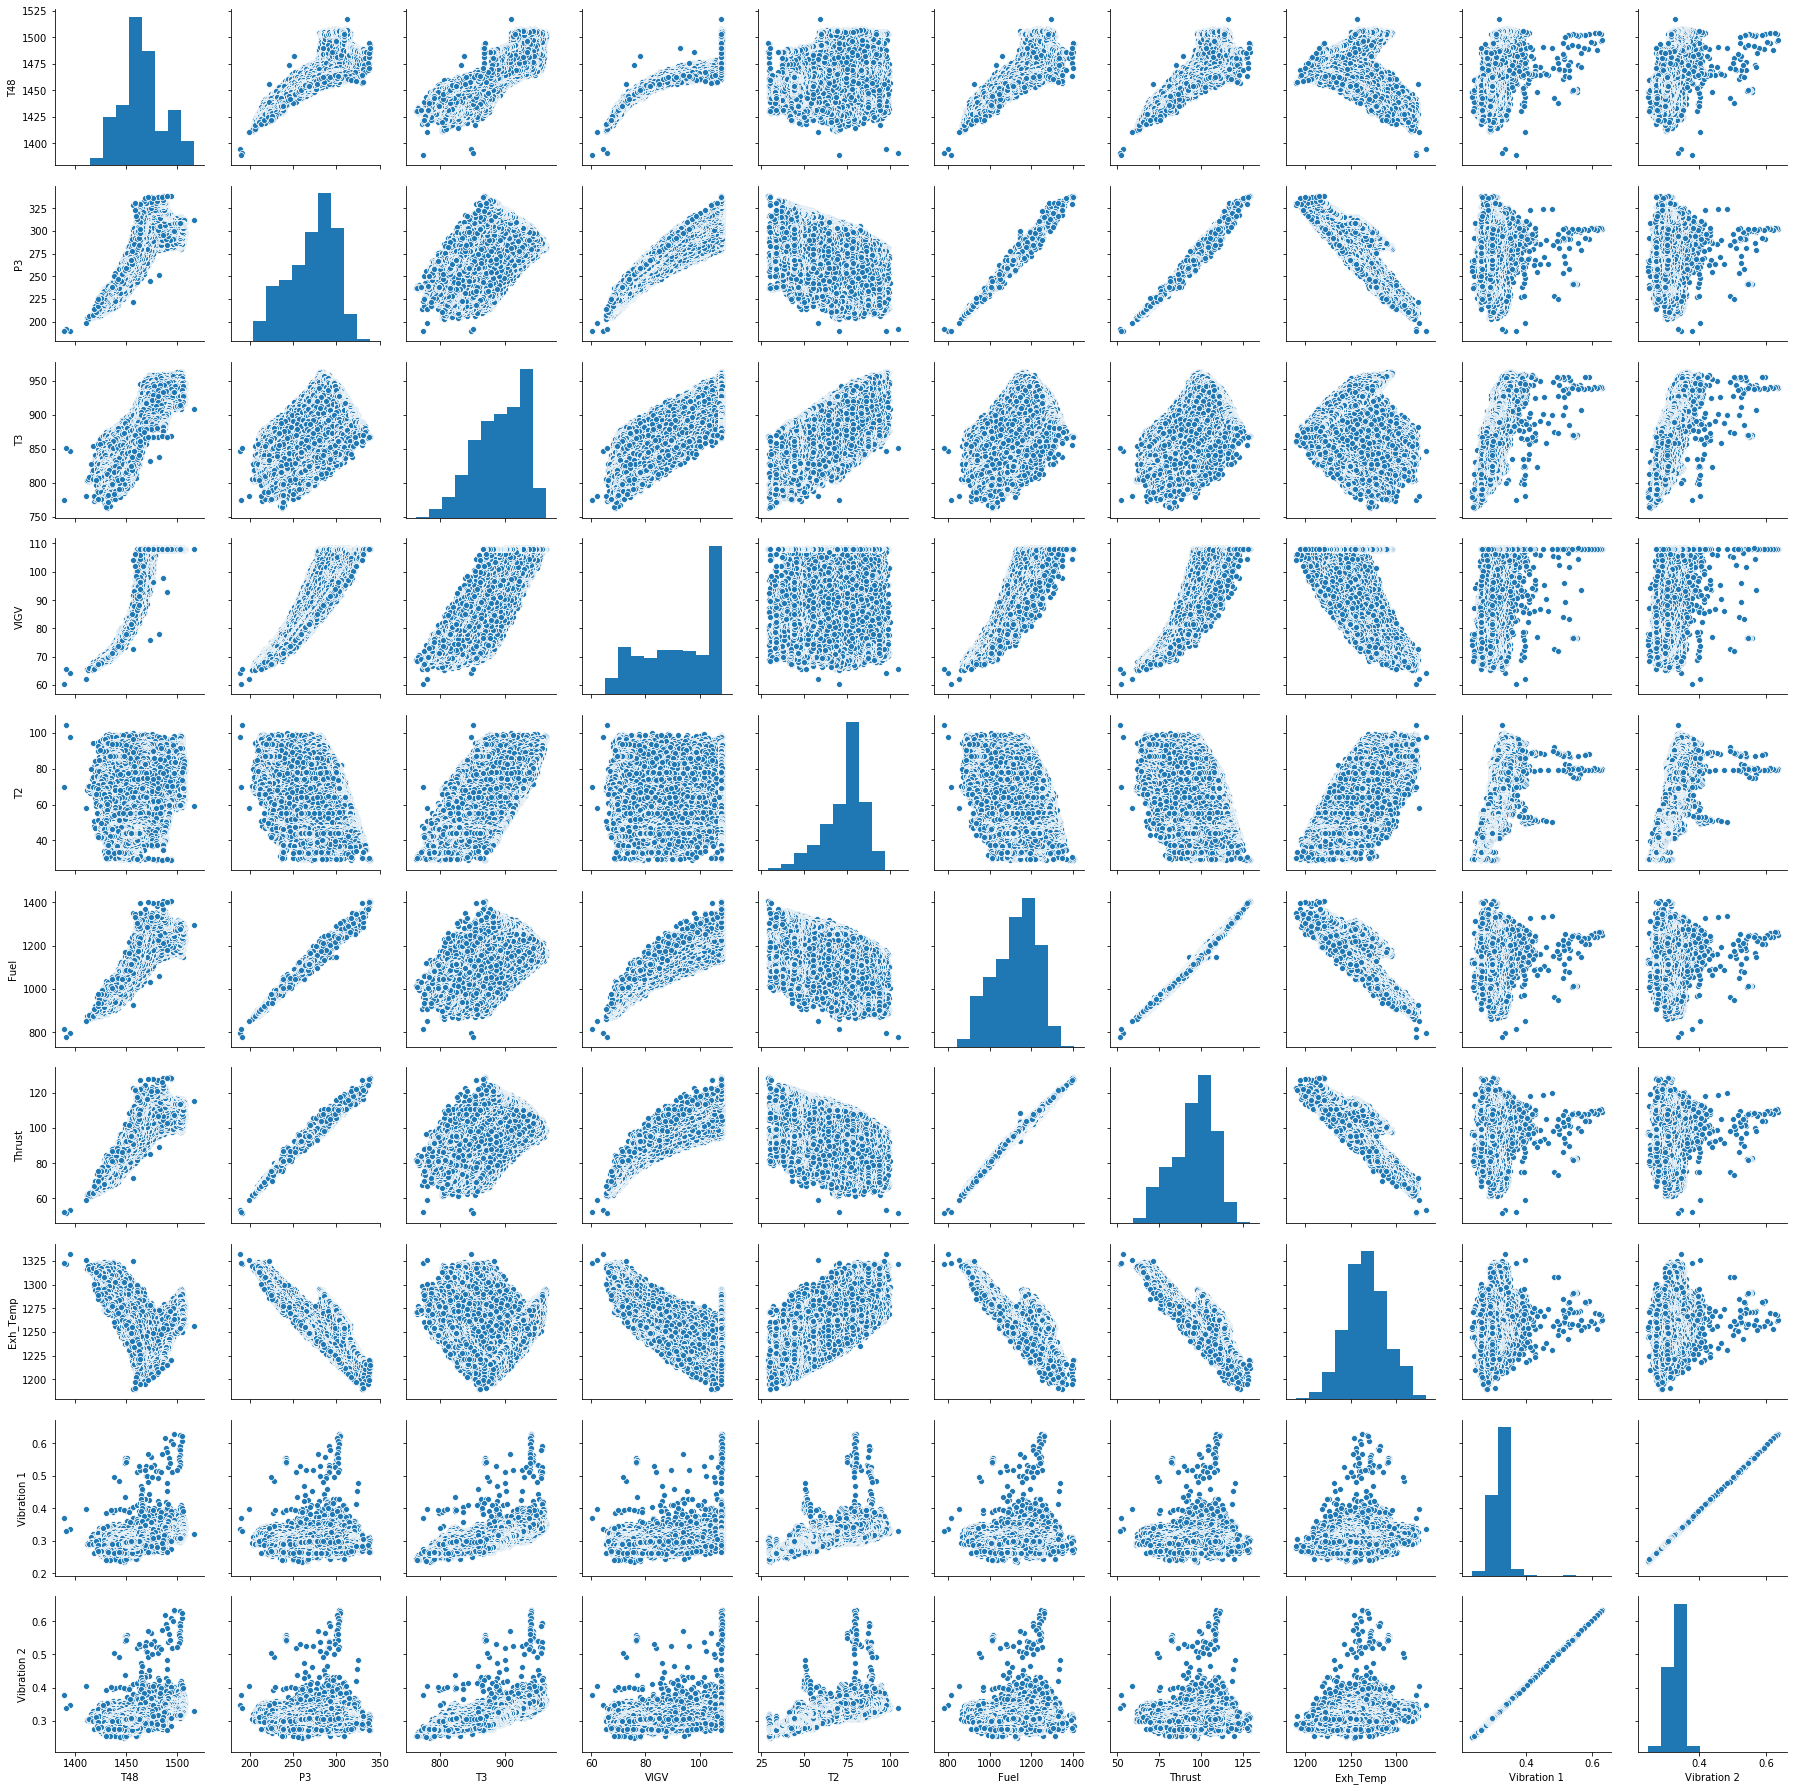

In [27]:
sns.pairplot(flight_df.iloc[:,1:])
plt.show();

In [28]:
X_train=flight_df[~((flight_df["Test Cell Sequence"]==6)|
                    (flight_df["Test Cell Sequence"]==5))][["T48","P3","T3","T2"
                                                            ,"VIGV","Exh_Temp"]].values
X_val=flight_df[(flight_df["Test Cell Sequence"]==5)][["T48","P3","T3","T2","VIGV",
                                                          "Exh_Temp"]].values
y_train=flight_df[~((flight_df["Test Cell Sequence"]==6)|
                    (flight_df["Test Cell Sequence"]==5))]["Thrust"].values
y_val=flight_df[(flight_df["Test Cell Sequence"]==5)]["Thrust"].values;

In [29]:
'''
Before applying PCA, we will need to scale/normalize the input array
'''
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train);

In [64]:
'''
We're only keeping the principal components that explain up to 97% of variance
'''
pca=PCA(n_components=0.97,random_state=2301)
X_train_pca=pca.fit_transform(X_train_scaled)
print('Number of Components:',pca.n_components_);

Number of Components: 3


In [65]:
'''
Fit a regression model using the target variable and the principal components
'''
reg_pca=LinearRegression()
reg_pca.fit(X_train_pca,y_train)
y_train_pred=reg_pca.predict(X_train_pca);

# test model on validation

In [66]:
'''
Before applying PCA we will need to scale/normalize the input array
'''
X_val_scaled=scaler.transform(X_val);

# Important
- Notice how I called the scaler method that we fit on the training data. We performed Transform. If you do fit again, then it will rescale based on this new data, which will result in incorrect results

In [53]:
'''
Transform new input with PCA
'''
X_val_pca=pca.transform(X_val_scaled);

In [54]:
'''
Predict new data with regression
'''
y_val_pred=reg_pca.predict(X_val_pca);

In [55]:
'''
creating a new plot with a title and axis labels. 
'''
p1 = figure(plot_width=350, plot_height=350,title="Actual vs predicted (training)", x_axis_label='actual', 
            y_axis_label='predicted')
p2 = figure(plot_width=350, plot_height=350,title="Actual vs predicted (validation)", x_axis_label='actual', 
            y_axis_label='predicted')
p1.scatter(y_train, y_train_pred),p2.scatter(y_val, y_val_pred);

In [56]:
show(row(p1,p2));

# Using Pipelines. Mighty mighty Pipelines
**We will now use Scikit-Learn pipelines**
  1. We set the pipeline with either the Pipeline or make_pipeline command
  2. Pipelines are a series of transform methods, the final step of a pipeline does not have to be a transform

<img src="IMAGES/pipelines.PNG" style="height: 500px;">
<font size=2>*Python Machine Learning*</font>

In [67]:
'''
Just like all algorithms, we first call the algorithm to instantiate it
- We call the scaler method, then we transform using PCA and last we call a linear regression
- We then fit the pipeline like other methods before
- Run predict

'''
pca_reg_pipe=Pipeline([('std_scaler', StandardScaler()),('pca',PCA(random_state=2301)),
                                                         ('linereg',LinearRegression())])
# We didn't pass number of components
pca_reg_pipe.fit(X_train, y_train)
y_train_pred=pca_reg_pipe.predict(X_train)
y_val_pred=pca_reg_pipe.predict(X_val);

In [80]:
# Calling out a pipeline step
pca_reg_pipe.named_steps

{'std_scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'pca': PCA(copy=True, iterated_power='auto', n_components=None, random_state=2301,
   svd_solver='auto', tol=0.0, whiten=False),
 'linereg': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False)}

In [81]:
# Calling out specific info about a step:
pca_reg_pipe.named_steps['pca'].n_components_

6

In [68]:
'''
We're using MSE as a measure of model performance
'''
pcamsetrain=mean_squared_error(y_train,y_train_pred)
pcamseval=mean_squared_error(y_val,y_val_pred)
print("Train Error:\n{}".format(pcamsetrain))
print("Validation Error:\n{}".format(pcamseval));

Train Error:
0.21952433259062218
Validation Error:
0.6832807190433523


In [69]:
'''
creating a new plot with a title and axis labels. 
'''
p1 = figure(plot_width=350, plot_height=350,title="training actual vs predicted", x_axis_label='actual', 
            y_axis_label='predicted')
p2 = figure(plot_width=350, plot_height=350,title="Validation actual vs predicted", x_axis_label='actual', 
            y_axis_label='predicted')
p1.scatter(y_train, y_train_pred),p2.scatter(y_val, y_val_pred);

In [70]:
show(row(p1,p2));

In [72]:
residval=y_val_pred-y_val
df=flight_df[(flight_df["Test Cell Sequence"]==5)]
df=df.assign(residuals = lambda x: residval);

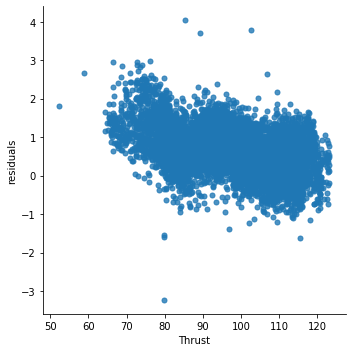

In [73]:
sns.lmplot(x="Thrust", y="residuals", data=df, height=5,fit_reg=False,scatter_kws={"s": 25});

# Grid Search

* How do we assess optimum number of trees in Random Forest?
* Do we have the right number of min samples per splits?

Grid Search with cross validation gives us the best model with optimized paramters based on the holdout set scores
* Grid Search is essentially a nested for loop for all parameters performed on each cross validation fold
* Scikit learn has a built-in function to perform grid search with minimalist code

<img src="IMAGES/Hyperparamter tuning.PNG" style="height: 500px;">
<font size=2>*Python Machine Learning second edition*</font>

**Grid Search example**

In [83]:
'''
creating parameter list
'''
cv_params = {'max_depth': [3,15,100,500], 'min_samples_split': [5,20,50,200]}

'''
initializing Grid Search method
'''
gs = GridSearchCV(estimator=tree.DecisionTreeRegressor(),param_grid=cv_params,
                  scoring="neg_mean_squared_error",n_jobs=-1, cv=10,return_train_score=False);

**Hold out cross validation gives us a way to test our models on data it has not seen before. This is essential for building valid models**
<img src="IMAGES/K-fold.png" style="height: 500px;">
<font size=2>*Python Machine Learning second edition*</font>

In [87]:
gs.fit(X_train, y_train);

In [88]:
gs.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=50, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# Using Grid Search with Pipelines to search for best algorithms

* You can use pipelines along with Gridsearch to search a space of algorithms and processing steps
* care needs to be taken to not create a very large search space

In [93]:
'''
We first define our pipeline
'''
pipe=Pipeline([('preprocessing', StandardScaler()), ('regressor', SVR())])
'''
We now create the search space
'''

param_grid = [
    {'regressor': [SVR()], 'preprocessing': [StandardScaler(), None],
     'regressor__gamma': [0.1, 10],
     'regressor__C': [0.1, 10]},
    {'regressor': [tree.DecisionTreeRegressor()],
     'preprocessing': [None], 'regressor__max_depth': [5, 10]}]

'''
We initialize the grid and the fit it
'''
grid = GridSearchCV(pipe, param_grid, cv=2,n_jobs=-1)
grid.fit(X_train, y_train);

'\nWe first define our pipeline\n'

'\nWe now create the search space\n'

'\nWe initialize the grid and the fit it\n'

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessing', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'regressor': [SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)], 'preprocessing': [StandardScaler(copy=True, with_mean=True, with_std=True), None], 'regressor__gamma': [0.1, 10], 'regressor__C':...se, random_state=None, splitter='best')], 'preprocessing': [None], 'regressor__max_depth': [5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [94]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('preprocessing', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

<!--NAVIGATION-->
##### <[Contents](Index.ipynb) | [Ransac for data cleansing](_02_RANSAC.ipynb)>